In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import datetime
import re
import functools

In [2]:
# This block is for part 1 step 1
r = requests.get('https://cmsc320.github.io/files/top-50-solar-flares.html')

html_text=r.content

soup = BeautifulSoup(html_text, 'html.parser')
#soup.prettify()

# Just comment the above line since the output is long and messy

all_frames = pd.read_html(r.text,flavor='bs4')
using_table=all_frames[0]

using_table=using_table.rename(columns={"Unnamed: 0":"rank","Unnamed: 1": "x_class","Unnamed: 2":"date"})
using_table.index=range(1,51)
using_table

using_table

# Here is the answer for Part 1 Step 1

# The code above is not very complicated. 
# First, I use requests.get() to get the data from the website.

# Then, I find that pd.read_html can read the website itself, and the table we need is the first
# one in the output.

# At last, I rename the column names.

,rank,x_class,date,Region,Start,Maximum,End,Unnamed: 7
1,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
4,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


In [3]:
# This block is for part 1 step 2

using_table=using_table.drop(axis=1,labels='Unnamed: 7')

using_table['Start'] = pd.to_datetime(using_table['date'].apply(str)+' '+using_table['Start'])

using_table['Maximum'] = pd.to_datetime(using_table['date'].apply(str)+' '+using_table['Maximum'])

using_table['End'] = pd.to_datetime(using_table['date'].apply(str)+' '+using_table['End'])

using_table['date']=pd.to_datetime(using_table['date'])

using_table['Region']=using_table['Region'].replace(to_replace='-',value=np.NaN)

def clear_x_class(x):
    
    if x[len(x)-1]=='+' or x[len(x)-1]=='.':
        return x[0:len(x)-1]
    else:
        return x


answer_for_step2=using_table.copy()


    
answer_for_step2['x_class']=answer_for_step2['x_class'].apply(clear_x_class)

answer_for_step2




# Here is the answer for Part 1 Step 2

# I use pd.to_datetime() and apply() to convert the start, max and end column into datestamp.
# Also, I clean the x_class column so that any entry end with '+' or '-' will be replaced with
# the same data just without the last '+' or '-'

# Then, I use replace() to replace the '-' to np.NaN

,rank,x_class,date,Region,Start,Maximum,End
1,1,X28,2003-11-04,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
2,2,X20,2001-04-02,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
3,3,X17.2,2003-10-28,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
4,4,X17,2005-09-07,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
5,5,X14.4,2001-04-15,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
6,6,X10,2003-10-29,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
7,7,X9.4,1997-11-06,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
8,8,X9.3,2017-09-06,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
9,9,X9,2006-12-05,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
10,10,X8.3,2003-11-02,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [4]:
# This block is for part 1 step 3

r= requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")

web_text=r.text

text_arr=web_text.split("\n")

text_arr[15]

new_arr = text_arr[15:]

new_arr=new_arr[:518]

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

l=[]

for s in new_arr:
    l.append(cleanhtml(s))

for i in range(0,len(l)):
   l[i]=l[i].split()


for i in range(0,len(l)):
    l[i]=l[i][:14]
    



df = pd.DataFrame(l)



df[0]=df[0]+" "+df[1]

df=df.drop(1, axis=1)

df[0]=pd.to_datetime(df[0])

df[2]=df[2]+" "+df[3]

copy=[]
for i in range(0,len(df)):
    copy.append(str(df[0][i].year))

df['year']=copy


def my_to_datetime(date_str):
    if date_str[11:13] == '--':
        return np.nan
    
    if date_str[11:13] != '24':
        return pd.to_datetime(date_str, format='%Y/%m/%d %H:%M')
    
    
    date_str = date_str[0:11] + '00' + date_str[13:]
    return pd.to_datetime(date_str, format='%Y/%m/%d %H:%M') + \
           datetime.timedelta(days=1)


df[2]=df['year']+"/"+df[2]




df[2] = df[2].apply(my_to_datetime)

df[9] = df['year']+"/"+df[9]+" "+df[10]
df[9]=df[9].apply(my_to_datetime)

df=df.drop(3, axis=1)

df=df.drop('year',axis=1)
df=df.drop(10,axis=1)


df = df.rename(columns = {0: 'start_datetime',2:  'end_datetime',4: 'start_frequency',5: 'end_frequency',6: 'flare_location',7: 'flare_region',8: 'importance',9:  'cme_datetime',11:  'cpa',12: 'width',13: 'speed'})

df

# Here is answer for Part 1 Step 3

# This is similar to Part 1 Step 1. First, use requests to get the data from the website.
# Since this table is stored in a long array, I use split to make a list and then store
# it into a dataframe.

# Then, use the same trick on the start_datetime, end_datetime and cme_datetime (by apply())
# However, since there are 24:00 in some column, I need to create my my_to_datetime().

# Note that the merge the date and time into datetime should be a part of the next step, but I did it here.

# At last, I drop the column I used for cleaning the data and rename the columns.


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,Halo,360,878
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,Halo,360,464
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,Halo,360,1418
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,Halo,360,1571
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,-----,X8.3,2017-09-10 16:00:00,Halo,360,3163
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252


In [5]:
# This block is for part 1 step 4

is_halo_list=[]
cpa_list=[]
for i in range(0,len(df)):
    if df['cpa'][i]=="Halo":
        is_halo_list.append(True)
        cpa_list.append('NA')
    else:
        is_halo_list.append(False)
        cpa_list.append(df['cpa'][i])



is_halo_list
df['is_halo']=is_halo_list
df['cpa'] = cpa_list

width_lower_bound_list=[]
for i in range(0, len(df)):
    if ">" in df['width'][i]:
        width_lower_bound_list.append(True)
    else:
        width_lower_bound_list.append(False)

df['width_lower_bound']=width_lower_bound_list


answer_for_step_4=df.copy()
answer_for_step_4['flare_region']=answer_for_step_4['flare_region'].replace(to_replace='-----',value=np.NaN)
answer_for_step_4['importance']=answer_for_step_4['importance'].replace(to_replace='----',value=np.NaN)
answer_for_step_4['cpa']=answer_for_step_4['cpa'].replace(to_replace='----',value=np.NaN)
answer_for_step_4['width']=answer_for_step_4['width'].replace(to_replace='----',value=np.NaN)
answer_for_step_4['speed']=answer_for_step_4['speed'].replace(to_replace='----',value=np.NaN)



answer_for_step_4
# Answer for Part 1 Step 4

# First, I create a list that is used to store new values for the cpa column, and replace
# the cpa column with the list. At the same time, I have a is_halo list to store whether
# a row is halo or not, and put the list into the dataframe as the is_halo column.

# I do the similar thing for the width_lower_bound column to create this new column. First,
# create a list with appropriate data and put the list into the dataframe.

# Then, I notice that only flare_region, importance, cpa, width and speed column has missing
# value, and I replace them by np.NaN

# Since I change the datetime column in the last step, I do not need to do it in this step.

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NA,360,1418,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False


In [6]:
# This block is for part 2 question 1
df2 = pd.DataFrame()


for i in range(0,len(df)):
    if df['importance'][i] is np.nan:
        continue
    
    if 'X' in df['importance'][i]:
        df2=df2.append(df.loc[[i]])

#df2['just_date']=df2['start_datetime'].apply(lambda x:str(x)[0:10])



df2.index=range(92)

importance_list = []
for i in range(0,len(df2)):
    importance_list.append( float(df2['importance'][i][1:]))

df2['real_importance']=importance_list

df2.sort_values(by=['real_importance'],ascending=False,inplace=True)

top_50=df2.head(n=50)

top_50.index=range(1,51)

top_50=top_50.drop('real_importance',axis=1)

top_50['flare_region']=top_50['flare_region'].replace(to_replace='-----',value=np.NaN)
top_50['importance']=top_50['importance'].replace(to_replace='----',value=np.NaN)
top_50['cpa']=top_50['cpa'].replace(to_replace='----',value=np.NaN)
top_50['width']=top_50['width'].replace(to_replace='----',value=np.NaN)
top_50['speed']=top_50['speed'].replace(to_replace='----',value=np.NaN)


top_50
# Comparing the top 50 solar flare table from NASA to the one from SWL,
# we can find that SWL has some data that NASA does not have. For example,
# the 4th solar flare in SWL table, on 2005/09/07 does not have have a
# corresponding row in the NASA table.

# Therefore, my conclusion is that SWL cannot be replicated well from
# NASA, since the NASA data miss at least 15 rows that SWL has, which is
# nearly 30%.

# Here is the answer for Part2 Question 1

# Some explanation for this question:
# df2 is a dataframe with the rows from NASA that have 'X' in the importance column.

# top_50 is a dataframe with the highest 50 importance in df2, with descending order.

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_halo,width_lower_bound
1,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,True,False
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False
3,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NA,360,2459,True,False
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False
5,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,True,False
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False
7,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False
8,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False
9,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,True,False
10,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False


In [7]:
# This block is for part 2 question 2

SWL_table = using_table
NASA_table = df
NASA_table['best_matched_rank']=pd.Series(np.nan, index=NASA_table.index)
def clear_x_class(x):
    
    if x[len(x)-1]=='+' or x[len(x)-1]=='.':
        return x[0:len(x)-1]
    else:
        return x

    
SWL_table['x_class']=SWL_table['x_class'].apply(clear_x_class)
#NASA_table['importance']=NASA_table['importance'].apply(clear_x_class)
a=NASA_table['importance'][514]
SWL_table['date']=SWL_table['date'].apply(lambda x: str(x)[0:10])
#print(SWL_table['date'][1])
NASA_table['approx_date']=NASA_table['start_datetime'].apply(lambda x: str(x)[0:10])


def best_matched_rank(index):
    rl=[]
    for i, row in SWL_table.iterrows():
        if row['x_class']== NASA_table['importance'][index] and row['date']==NASA_table['approx_date'][index]:
            
            rl.append(row['rank'])
       
            #print("nothing")
    return rl



for i, row in NASA_table.iterrows():
    
    temp = best_matched_rank(i)
    if(temp != []):
        if(len(temp)!=1):
            print(temp)
        NASA_table['best_matched_rank'][i]=temp[0]
        #count=count+1
        #print(count)
    
NASA_table.drop(columns='approx_date',axis=1)

NASA_table['flare_region']=NASA_table['flare_region'].replace(to_replace='-----',value=np.NaN)
NASA_table['importance']=NASA_table['importance'].replace(to_replace='----',value=np.NaN)
NASA_table['cpa']=NASA_table['cpa'].replace(to_replace='----',value=np.NaN)
NASA_table['width']=NASA_table['width'].replace(to_replace='----',value=np.NaN)
NASA_table['speed']=NASA_table['speed'].replace(to_replace='----',value=np.NaN)
NASA_table

# I define a SWL entry match best matches a NASA entry if and only if they happen on the same date (approximate to day)
# and have the same x_class
# For my best match, there is no case that a NASA entry has more than one SWL matches.

# Here is the answer for Part 2 Question 2

<ipython-input-7-af21fc9b78e8>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASA_table['best_matched_rank'][i]=temp[0]


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_halo,width_lower_bound,best_matched_rank,approx_date
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False,NaN,1997-04-01
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False,NaN,1997-04-07
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False,NaN,1997-05-12
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False,NaN,1997-05-21
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False,NaN,1997-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NA,360,1418,True,False,NaN,2017-09-04
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False,8.0,2017-09-06
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False,NaN,2017-09-10
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False,NaN,2017-09-12


<AxesSubplot:>

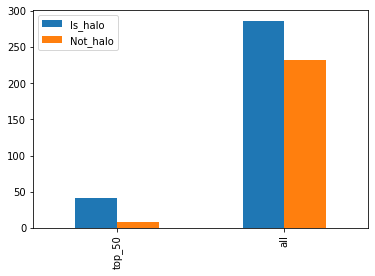

In [8]:
# This block is for part 2 question 3.

true_top_count = 0
true_all_count = 0
false_top_count = 0
false_all_count = 0

for i, r in top_50.iterrows():
    if r['is_halo']:
        true_top_count = true_top_count + 1
    else:
        false_top_count = false_top_count + 1
        
for i, r in NASA_table.iterrows():
    if r['is_halo']:
        true_all_count = true_all_count + 1
    else:
        false_all_count = false_all_count + 1
        
# print(true_top_count)
# print(true_all_count)
        
array_for_plot = np.array([ [true_top_count, false_top_count], [true_all_count ,false_all_count] ])

df_for_plot = pd.DataFrame(data=array_for_plot)

df_for_plot = df_for_plot.rename(columns = {0: 'Is_halo',1:'Not_halo'})

df_for_plot.index=['top_50','all']
df_for_plot

df_for_plot.plot.bar()


# Here is answer for Part2 Question 3

# I hope my plot can show the variation between the ratio of is_halo and not_halo between the
# top 50 flares and all flares.

# The plot shows that the difference between the blue bar and the orange bar comparing to
# their own height is more dramatic.
# Thus, the plot suggests that the ratio of is_halo flares and not_halo flares in top_50 is much higher
# comparing to the ratio of all flares.

# As a conclusion, from the graph, I find there is strong correlation between top 50 flares and whether it is
# a halo or not, because there are far more is_halo data in the top_50 flares ratio is nearly 7:1, while for all data, 
# the ratio is about 6:5. There exists a huge variation of this ratio in the top_50 and all_data.

# Therefore, if a flare is in the top 50, the probability of it to be halo would increase dramatically.


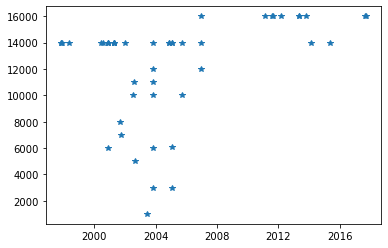

In [9]:
# The following is just a backup for Part2 Question 2.

import matplotlib.pyplot as plt

top_50['start_frequency']=top_50['start_frequency'].apply(lambda x:int(x))
plt.plot(top_50['start_datetime'], top_50['start_frequency'],'*')

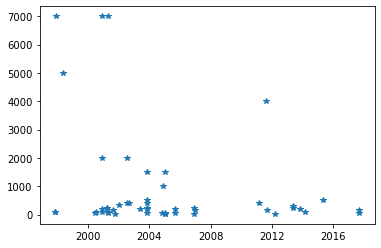

In [10]:
top_50['end_frequency']=top_50['end_frequency'].apply(lambda x:int(x))
plt.plot(top_50['start_datetime'], top_50['end_frequency'],'*')

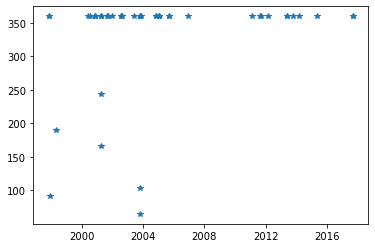

In [11]:
top_50['width']=top_50['width'].replace(to_replace='----',value=np.NaN)
top_50.dropna(subset=['width'],inplace=True)
top_50['width']=top_50['width'].apply(lambda x:int(x))
plt.plot(top_50['start_datetime'], top_50['width'], '*')

# This is just a backup for part2 question 3.
# For the top 50 flares, the graphs show that there is a positive relation between width and
# start frequency (i.e. If the flare has higher start frequency, it is more likely to have larger width)